In [ ]:

from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
drive.mount('/content/drive/')

import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/all.csv')
data['AttackerType'].values[250000]

Mounted at /content/drive/


array([2.52758125e+04, 4.87000000e+02, 4.61579300e+06, 6.08600200e+03,
       5.73118264e+03, 1.89500000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.52768125e+04, 4.87000000e+02,
       6.08600200e+03, 5.73118264e+03, 1.89500000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [ ]:
data['AttackerType'].values[108584]

16

In [ ]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler






datax= data.drop(['AttackerType'],axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
xx = scaler.fit_transform(datax)


xx=xx.astype(float)

xx=xx.reshape((xx.shape[0], xx.shape[1], 1))
from keras.models import load_model

m1=tf.keras.models.load_model("/content/drive/MyDrive/bestmodel (1).h5",compile=True,custom_objects=None)
t=m1.predict(xx,verbose=0)

classes = np.argmax(t, axis=1)
classes = classes.reshape(-1, 1)
classes[450000]

array([4])

In [ ]:
classes[108584]

array([5])

In [ ]:
classes[800]

array([0])

In [ ]:
for k, i, j in zip(x_test, y_test_classes, classes):
    print (k, '=>', i, j, ' ====> ', i==j)

(512434, 18)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 102       
Total params: 19,606
Trainable params: 19,606
Non-trainable params: 0
___________________________________________________

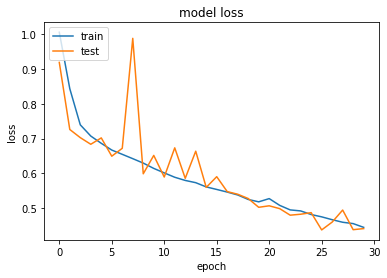

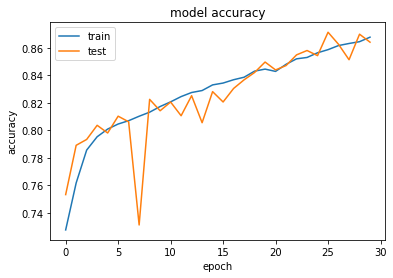

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 [0.56581507]
 [0.        ]] => [0] [3]  ====>  [False]
[[0.57514623]
 [0.6407767 ]
 [0.47910124]
 [0.26457414]
 [0.47402656]
 [0.        ]
 [0.42473359]
 [0.81213857]
 [0.        ]
 [0.57514623]
 [0.6407767 ]
 [0.26432834]
 [0.47656173]
 [0.        ]
 [0.4255059 ]
 [0.81279902]
 [0.        ]] => [0] [3]  ====>  [False]
[[0.98845329]
 [0.89514563]
 [0.88938245]
 [0.46265407]
 [0.51654077]
 [0.        ]
 [0.44140377]
 [0.62863279]
 [0.        ]
 [0.98845329]
 [0.89514563]
 [0.4625047 ]
 [0.51764001]
 [0.        ]
 [0.44104489]
 [0.63061944]
 [0.        ]] => [0] [3]  ====>  [False]
[[0.04073039]
 [0.30097087]
 [0.04057338]
 [0.44656536]
 [0.4968468 ]
 [0.        ]
 [0.46629344]
 [0.49085093]
 [0.        ]
 [0.04073039]
 [0.30097087]
 [0.44656536]
 [0.4968468 ]
 [0.        ]
 [0.46629344]
 [0.49085093]
 [0.        ]] => [5] [3]  ====>  [False]
[[0.40820099]
 [0.53203883]
 [0.39811608]
 [0.29005149]
 [0.45557568

In [ ]:
#code LSTM

drive.mount('/content/drive/')

data=pd.read_csv('/content/drive/MyDrive/all.csv')



x= data.drop(['AttackerType'],axis=1)

y= data[['AttackerType']]
scaler = MinMaxScaler(feature_range=(0, 1))
xx = scaler.fit_transform(x)

y=y.values.ravel()
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y,dtype='int')

xx=xx.astype(float)

xx=xx.reshape((xx.shape[0], xx.shape[1], 1))

x_train, x_test, y_train, y_test = train_test_split(xx,dummy_y,test_size=0.2)

model = Sequential()
model.add(LSTM(64, input_shape=(17,1), activation='relu', return_state=False))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=30, batch_size=100, validation_data=(x_test, y_test))

model.save("model.h5")

m1=tf.keras.models.load_model("/content/drive/MyDrive/model.h5",compile=True,custom_objects=None)

t=m1.predict(x_test,verbose=0)

classes = np.argmax(t, axis=1)
# Map probability to the appropriate class
suitability = ['noattack', 'attack1', 'attack2', 'attack4 ','attack8','attack16']
classes = classes.reshape(-1, 1)
classes
y_test_classes = np.argmax(y_test, axis=1)
y_test_classes = y_test_classes.reshape(-1, 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

tf.keras.utils.plot_model(
    m1,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,

)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

for k, i, j in zip(x_test, y_test_classes, classes):
    print (k, '=>', i, j, ' ====> ', i==j)



In [ ]:
#best code CNN LSTM
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

drive.mount('/content/drive/')
data=pd.read_csv('/content/drive/MyDrive/all.csv')
def len_array_atacker_type_value(value):
    result = len(data[data["AttackerType"] == value])
    return result

attackTypeArray = [1, 2, 8, 4, 16, 0]

for attack in attackTypeArray:
    print(attack, " : ", len_array_atacker_type_value(attack), "\n")

x= data.drop(['AttackerType'],axis=1)

y= data[['AttackerType']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
xx = scaler.fit_transform(x)



y=y.values.ravel()
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y,dtype='int')

xx=xx.astype(float)

xx=xx.reshape((xx.shape[0], xx.shape[1], 1))

x_train, x_test, y_train, y_test = train_test_split(xx,dummy_y,test_size=0.2)

model = Sequential()

model.add(Conv1D(filters=128,kernel_size=4,input_shape=(17,1)))

model.add(LSTM(64, input_shape=(17,1), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=30, batch_size=100, validation_data=(x_test, y_test))
model.save("bestmodel.h5")

#la suite de code CNN LSTM

m1=tf.keras.models.load_model("/content/drive/MyDrive/bestmodel (1).h5",compile=True,custom_objects=None)
t=m1.predict(x_test,verbose=0)

tf.keras.utils.plot_model(m1,to_file="modelphoto.png",show_shapes=True,show_dtype=None,show_layer_names=True,rankdir="TB",expand_nested=False,dpi=96)



classes = np.argmax(t, axis=1)
classes = classes.reshape(-1, 1)
classes
y_test_classes = np.argmax(y_test, axis=1)
y_test_classes = y_test_classes.reshape(-1, 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

for k, i, j in zip(x_test, y_test_classes, classes):
    print (k, '=>', i, j, ' ====> ', i==j)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
1  :  30473 

2  :  30473 

8  :  29460 

4  :  30510 

16  :  28832 

0  :  362686 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 14, 64)            320       
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_____________________________________

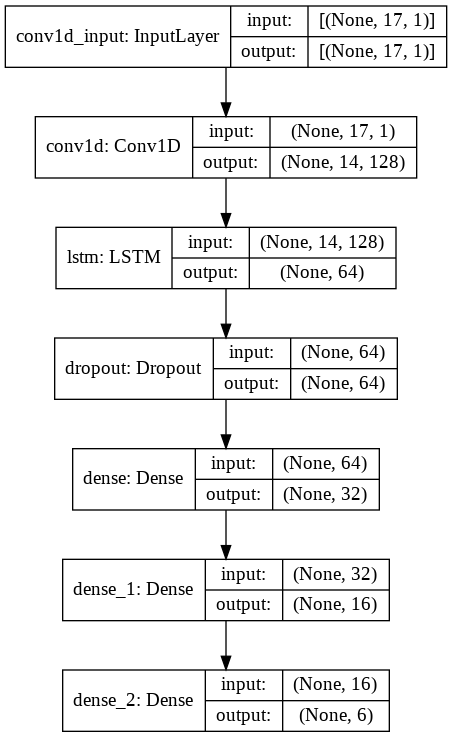

In [ ]:
m1=tf.keras.models.load_model("/content/drive/MyDrive/bestmodel (1).h5",compile=True,custom_objects=None)
tf.keras.utils.plot_model(m1,to_file="modelphoto.png",show_shapes=True,show_dtype=None,show_layer_names=True,rankdir="TB",expand_nested=False,dpi=96)


In [ ]:
#la suite de code CNN LSTM

m1=tf.keras.models.load_model("/content/drive/MyDrive/bestmodel (1).h5",compile=True,custom_objects=None)
t=m1.predict(x_test,verbose=0)

tf.keras.utils.plot_model(m1,to_file="modelphoto.png",show_shapes=True,show_dtype=None,show_layer_names=True,rankdir="TB",expand_nested=False,dpi=96)



classes = np.argmax(t, axis=1)
classes = classes.reshape(-1, 1)
classes
y_test_classes = np.argmax(y_test, axis=1)
y_test_classes = y_test_classes.reshape(-1, 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

for k, i, j in zip(x_test, y_test_classes, classes):
    print (k, '=>', i, j, ' ====> ', i==j)

NameError: ignored

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
1  :  30473 

2  :  30473 

8  :  29460 

4  :  30510 

16  :  28832 

0  :  362686 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dropout_5 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 102       
Total params: 814
Trainable params:

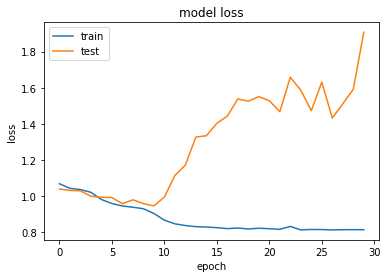

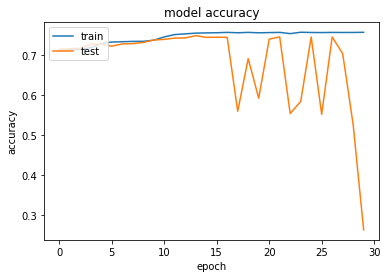

In [ ]:

#simpleRnn

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM ,SimpleRNN
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

from keras.layers import Conv1D

drive.mount('/content/drive/')
data=pd.read_csv('/content/drive/MyDrive/all.csv')
def len_array_atacker_type_value(value):
    result = len(data[data["AttackerType"] == value])
    return result

attackTypeArray = [1, 2, 8, 4, 16, 0]

for attack in attackTypeArray:
    print(attack, " : ", len_array_atacker_type_value(attack), "\n")

x= data.drop(['AttackerType'],axis=1)

y= data[['AttackerType']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
xx = scaler.fit_transform(x)



y=y.values.ravel()
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y,dtype='int')

xx=xx.astype(float)

xx=xx.reshape((xx.shape[0], xx.shape[1], 1))

x_train, x_test, y_train, y_test = train_test_split(xx,dummy_y,test_size=0.2)

model = Sequential()


model.add(SimpleRNN(4,input_shape=(17,1), activation='relu', return_state=False))


model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=30, batch_size=100, validation_data=(x_test, y_test))






plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


